<a href="https://colab.research.google.com/github/d-hackmt/Fundamentalss-of-Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis 

## Digits Data Set

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
dataset.data.shape

(1797, 64)

In [ ]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

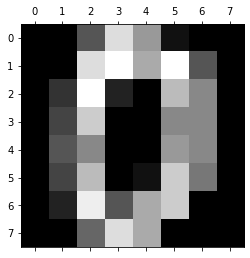

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

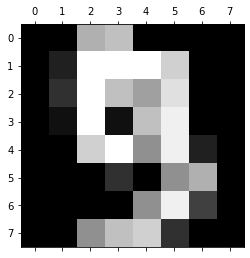

In [ ]:
plt.matshow(dataset.data[9].reshape(8,8))

In [ ]:
dataset.target[:5]

array([0, 1, 2, 3, 4])

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
X = df
y = dataset.target

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

Use PCA to reduce dimensions

In [ ]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


Use components such that 95% of variance is retained

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
pca.n_components_

29

PCA created 29 components out of 64 original columns

In [ ]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

Let's now select only two components

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [ ]:
X_pca

array([[ -1.25946688,  21.27488507],
       [  7.95761048, -20.76869851],
       [  6.99192373,  -9.95598865],
       ...,
       [ 10.80128371,  -6.9602536 ],
       [ -4.87209923,  12.42394863],
       [ -0.34438876,   6.36554812]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

You can see that both combined retains 0.14+0.13=0.27 or 27% of important feature information

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy

## Heart Failure Data Set KAggle

Load heart disease dataset in pandas dataframe.

Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3.

Convert text columns to numbers using label encoding and one hot encoding
Apply scaling.

Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy.

Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy.

Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life.


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
import pandas as pd

# https://www.kaggle.com/fedesoriano/heart-failure-prediction
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Treat Outliers

In [ ]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape

(915, 12)

In [ ]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [ ]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]
df2.shape

(909, 12)

In [ ]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [ ]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]
df3.shape

(902, 12)

In [ ]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df4 = df3.copy()
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [ ]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


In [ ]:
X = df5.drop("HeartDisease",axis='columns')
y = df5.HeartDisease

X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [ ]:
X_train.shape

(721, 13)

In [ ]:
X_test.shape

(181, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.861878453038674

Use PCA to reduce dimensions

In [ ]:
X

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,0,1,0,0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 93.82465373, -29.40099458],
       [-15.58422331, -14.10909233],
       [ 83.29606634,  38.6867453 ],
       ...,
       [-67.57318721,  17.61319354],
       [ 40.70458237, -33.38750602],
       [-19.91368346, -37.29085722]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.6961325966850829